# Learning Vector Quantization
The Learning Vector Quantization (LVQ) algorithm is a lot like **k-Nearest Neighbors**.

Predictions are made by finding the best match among a library of patterns. The difference is that the library of patterns is learned from training data, rather than using the training patterns themselves.

The library of patterns are called codebook vectors and each pattern is called a codebook. The codebook vectors are initialized to randomly selected values from the training dataset. Then, over a number of epochs, they are adapted to best summarize the training data using a learning algorithm.

The learning algorithm shows one training record at a time, finds the best matching unit among the codebook vectors and moves it closer to the training record if they have the same class, or further away if they have different classes.

Once prepared, the codebook vectors are used to make predictions using the k-Nearest Neighbors algorithm where k=1.

In [1]:
!pip install neupy

## Dataset

In this section, we'll use commonly available Iris Dataset. We'll treat it as classification dataset.

We'll use built-in function from scikit-learn to load the dataset.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from neupy import algorithms

plt.style.use('ggplot')
ggplot_colors = plt.rcParams['axes.prop_cycle']
colors = np.array([c['color'] for c in ggplot_colors])

Load data

In [4]:
file="CSM dataset.csv"
df=pd.read_csv(file, sep=";")
df.head

<bound method NDFrame.head of                       Movie    Year  Ratings  Genre        Gross       Budget  \
0                   13 Sins  2014.0      6.3    8.0       9130.0    4000000.0   
1            22 Jump Street  2014.0      7.1    1.0  192000000.0   50000000.0   
2            3 Days to Kill  2014.0      6.2    1.0   30700000.0   28000000.0   
3    300: Rise of an Empire  2014.0      6.3    1.0  106000000.0  110000000.0   
4         A Haunted House 2  2014.0      4.7    8.0   17300000.0    3500000.0   
..                      ...     ...      ...    ...          ...          ...   
227                   Aloha  2015.0      5.5   15.0   21000000.0   37000000.0   
228     Unfinished Business  2015.0      5.4    8.0   10200000.0   35000000.0   
229                War Room  2015.0      5.4    1.0   12300000.0    3000000.0   
230             The Gallows  2015.0      4.4   15.0   22600000.0     100000.0   
231                     NaN     NaN      NaN    NaN          NaN          NaN  

In [5]:
dataset = datasets.load_iris()
data, target = dataset.data, dataset.target

Define LVQ Model

In [6]:
lvqnet = algorithms.LVQ3(
    # number of features
    n_inputs=4,

    # number of data points that we want
    # to have at the end
    n_subclasses=30,

    # number of classes
    n_classes=3,

    verbose=True,
    show_epoch=20,

    step=0.001,
    n_updates_to_stepdrop=150 * 100,
)


Main information

[ALGORITHM] LVQ3

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 20
[OPTION] shuffle_data = False
[OPTION] train_end_signal = None
[OPTION] minstep = 1e-05
[OPTION] n_classes = 3
[OPTION] n_inputs = 4
[OPTION] n_subclasses = 30
[OPTION] n_updates_to_stepdrop = 15000
[OPTION] prototypes_per_class = None
[OPTION] weight = None
[OPTION] epsilon = 0.1
[OPTION] slowdown_rate = 0.4
[OPTION] step = 0.001



Train!

In [7]:
lvqnet.train(data, target, epochs=100)


Start training

[TRAINING DATA] shapes: (150, 4)
[TRAINING] Total epochs: 100

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |    0.026667 |           - |       17 ms |
|          20 |    0.026667 |           - |       16 ms |
|          40 |        0.02 |           - |       21 ms |
|          60 |        0.02 |           - |       16 ms |
|          80 |    0.033333 |           - |        0 ns |
|         100 |    0.033333 |           - |       17 ms |
---------------------------------------------------------



Evaluate!

In [8]:
def plot_scattermatrix(data, target):
    df = pd.DataFrame(data)
    df['target'] = target
    return sns.pairplot(df, hue='target', diag_kind='hist')

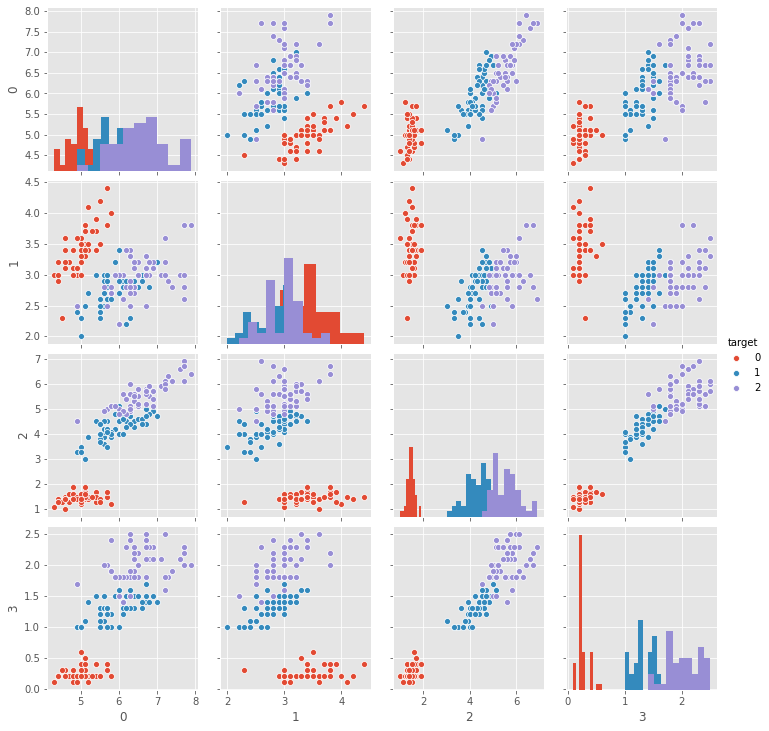

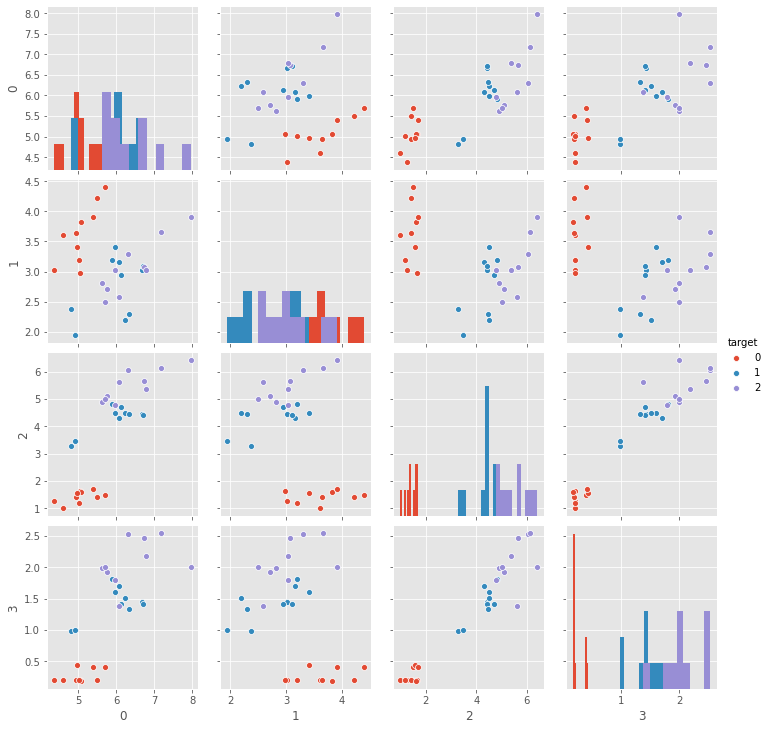

In [9]:
plot_scattermatrix(data, target)
plot_scattermatrix(data=lvqnet.weight, target=lvqnet.subclass_to_class)
plt.show()